<a href="https://colab.research.google.com/github/ws17863276480/Deep-Learning-Emotion-Decoding-using-EEG-data-from-Autism-individuals/blob/master/eeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.9 MB/s eta 0:00:00


Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Using matplotlib as 2D backend.


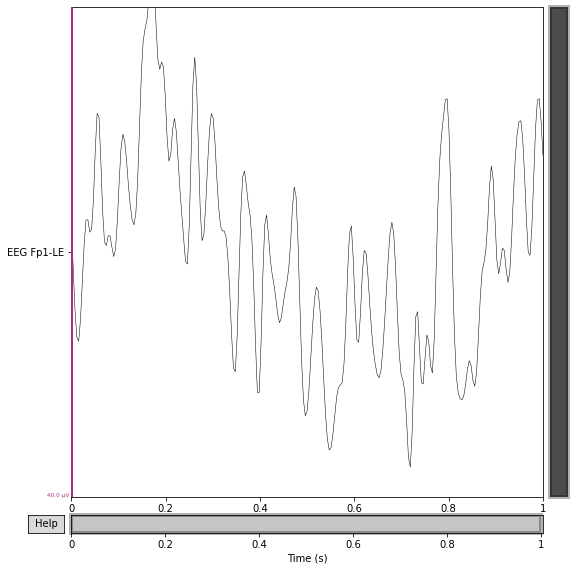

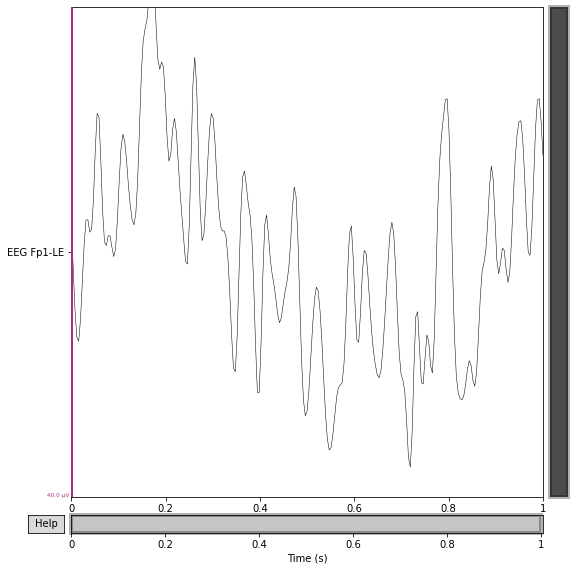

In [4]:
import mne

# 读取EDF文件
raw = mne.io.read_raw_edf('/content/eeg/1.edf', preload=True)

# 提取通道
channel_name = 'EEG Fp1-LE'
raw_ch = raw.copy().pick_channels([channel_name])

# 取中间1秒的时间片段
start_time = raw_ch.times[-1] / 2 - 0.5  # 取数据中间的1秒
duration = 1  # 持续时间
raw_ch_1s = raw_ch.copy().crop(tmin=start_time, tmax=start_time + duration)

# 绘制信号图像
raw_ch_1s.plot()



Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


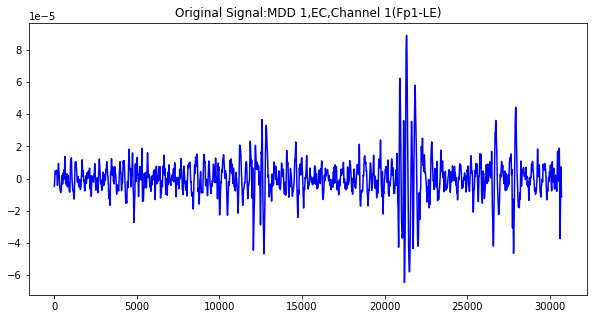

Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


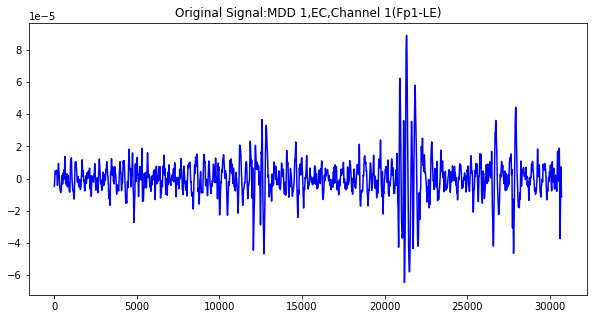

In [24]:
import mne
import numpy as np

# 设置文件名和路径
file_path = '/content/eeg/1.edf'

# 读取EDF文件数据
raw = mne.io.read_raw_edf(file_path, preload=True)

# 选择通道

raw_ch = raw.copy().pick_channels(['EEG Fp1-LE']).filter(l_freq=0.5, h_freq=4)

# 截取时间片段
start_time = (raw.n_times // 2 - 60 * raw.info['sfreq']).astype(int)  # 开始时间
end_time = (raw.n_times // 2 + 60 * raw.info['sfreq']).astype(int)  # 结束时间
raw_ch_120s = raw_ch.copy().crop(tmin=start_time / raw.info['sfreq'], tmax=end_time / raw.info['sfreq'])

# 计算时间轴
n_samples = raw_ch_120s.n_times
sfreq = raw_ch_120s.info['sfreq']
time_axis = np.arange(n_samples)

# 绘制信号图像
plt.figure(figsize=(10, 5))
plt.plot(time_axis, raw_ch_120s.get_data()[0], color='blue')

plt.title('Original Signal:MDD 1,EC,Channel 1(Fp1-LE)', y=1)
plt.show()


In [29]:
import mne
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 读取数据
raw = mne.io.read_raw_edf('/content/eeg/1.edf', preload=True)

# 获取EEG Fp1-LE通道的数据
ch_data = raw.get_data(picks=['EEG Fp1-LE'])

# 取数据中间的120秒时间片段
tmin, tmax = 60, 180
raw_ch_120s = raw.copy().crop(tmin=tmin, tmax=tmax)

# 采样频率
sfreq = raw_ch_120s.info['sfreq']

# 带通滤波器频带范围
freq_low, freq_high = 0.5, 4

# 滤波器阶数
order = 4

# 设计带通滤波器
b, a = signal.butter(order, [freq_low / (sfreq / 2), freq_high / (sfreq / 2)], btype='bandpass')

# 应用滤波器
data_filt = signal.filtfilt(b, a, ch_data[0])

# 绘制信号图像
n_samples = raw_ch_120s.n_times
time_axis = np.linspace(tmin, tmax, n_samples)
plt.plot(time_axis, data_filt)
plt.xlabel('Time (s)')
plt.ylabel('EEG Fp1-LE amplitude')
plt.title('Delta Band EEG Signal')
plt.show()


Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


ValueError: ignored

In [8]:
import mne
print(mne.__version__)



1.3.1


# 新段落

In [ ]:
!pip install PyWavelets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pywt

# 定义小波包分解层数
level = 5

# 定义小波包类型
wavelet = 'db4'

# 对信号进行小波包分解
wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode='symmetric', maxlevel=level)

# 打印小波包树的结构
print(wp.get_level(level).path)

# 提取指定频段的小波包系数
coeffs = []
for i in range(1, level+1):
    subbands = [node.path for node in wp.get_level(i, 'freq')]
    for subband in subbands:
        if subband.endswith('a'):
            continue
        coeffs.append(wp[subband].data)


# 新段落

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Extracting EDF parameters from /content/path/eeg/H S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Setting up band-stop filter from 48 - 52 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 48.25 Hz)
- Upper passband edge: 51.50 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 51.75 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pass

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


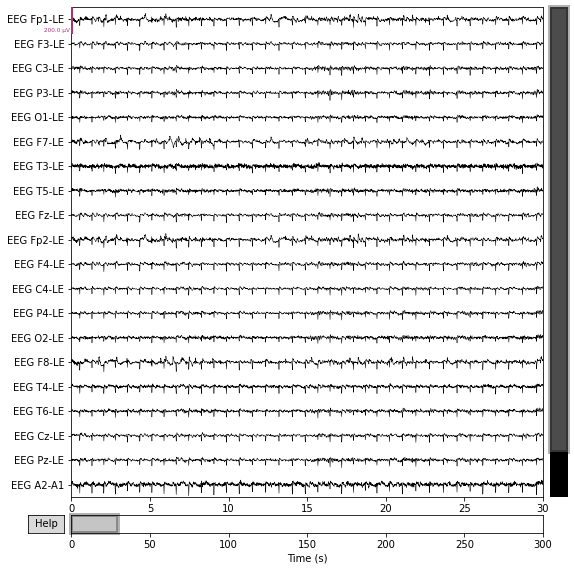

In [ ]:
import mne
import matplotlib.pyplot as plt

# 读取原始脑电信号数据
raw = mne.io.read_raw_edf('path/eeg/H S1 EC.edf', preload=True)

# 去除直流偏移
raw = raw.notch_filter(50, notch_widths=2)

raw = raw.filter(l_freq=0.5, h_freq=40)
raw = raw.set_eeg_reference()

# 绘制预处理后的脑电信号
raw.plot(duration=30, scalings=dict(eeg=100e-6))
plt.show()


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install EMD

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 6.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 41.7 MB/s eta 0:00:00


Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 45311  =      0.000 ...   176.996 secs...


<ipython-input-11-3da8dbae32d8>:4: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(file_path, preload=True)


IndexError: ignored

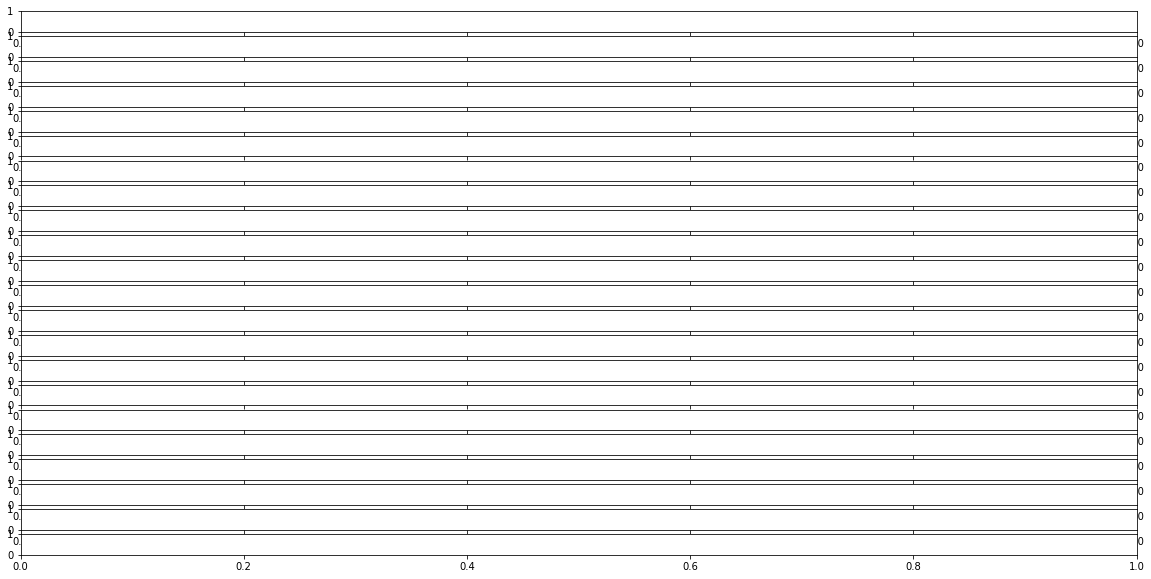

In [ ]:
import mne

file_path = '/content/eeg/1.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
channels = raw.ch_names  # 获取所有通道的名称

data_list = []  # 定义一个列表存储各通道数据
duration = 120  # 截取的时长
raw_ch = raw.copy().pick_channels([])  # 只选择当前通道
raw_ch_120s = raw_ch.copy().crop(tmin=0, tmax=duration)  # 截取指定时长的信号数据
data_list.append(raw_ch_120s.get_data()[0])  # 将信号数据添加到列表中

    

# 绘制多通道信号图像
fig, axes = plt.subplots(nrows=len(channels), figsize=(20, 10))
axes[1].plot(data_list[1])
axes[1].set_title('EEG Fp1-LE')    
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import mne

# 读取.edf文件
raw = mne.io.read_raw_edf('/content/eeg/1.edf')

# 选择通道
channel = 'EEG Fp1-LE'  # 选择F3通道
raw.pick_channels([channel])

# 获取数据和采样率
data, times = raw.get_data(return_times=True)
# 小波包分解
wavelet = pywt.Wavelet('db4')  # 选择小波类型
level = 4  # 小波包分解的层数
coeffs = pywt.wavedec(data, wavelet, level=level)

# 计算每个频段的小波包系数
# 计算每个频段的小波包系数
theta_coeffs = pywt.upcoef('a', coeffs[4][0], wavelet, level=4, take=len(data))
alpha_coeffs = pywt.upcoef('d', coeffs[3][0], wavelet, level=3, take=len(data))
beta_coeffs = pywt.upcoef('d', coeffs[2][0], wavelet, level=2, take=len(data))
gamma_coeffs = pywt.upcoef('d', coeffs[1][0], wavelet, level=1, take=len(data))


# 绘制频段图像

plt.figure(figsize=(10, 6))
plt.subplot(511)
plt.plot(data[:5000], 'k', label='Original signal')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Wavelet packet decomposition')
plt.savefig('figure.pdf')
plt.subplot(512)
plt.plot(theta_coeffs[:5000], 'r', label='Theta')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.savefig('figure.pdf')
plt.subplot(513)
plt.plot(alpha_coeffs[:5000], 'g', label='Alpha')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.savefig('figure.pdf')
plt.subplot(514)
plt.plot(beta_coeffs[:5000], 'b', label='Beta')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.savefig('figure.pdf')
plt.subplot(515)
plt.plot(gamma_coeffs[:5000], 'm', label='Gamma')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-f4a4b6f7fdfa>:7: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf('/content/eeg/1.edf')


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f707b9b9e50> (for post_execute):


KeyboardInterrupt: ignored